In [282]:
#Import Stuff
import pandas as pd
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
import math

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

In [300]:
#Credit Data
dfc = pd.read_csv("credit_risk_dataset.csv")
dfc.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [301]:
dfc.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [303]:
#Real Estate
dfr = pd.read_csv("NYC_Real_Estate.csv")
dfr.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


<h1>Assignment 4</h1>
<h3>Overview</h3>
For this assignment you'll do a realistic exploration of data up to and including creating predictive regression model(s).
<h3>Data</h3>
The data is the included datasets:
<ul>
<li><h4>Linear Regression:</h4> "NYC_Real_Estate.csv", which is a subset of some real data on the housing market in NYC. You'll use this dataset to create a linear regression model.
<li><h4>Logistic Regression:</h4> "credit_risk_dataset.csv", which is a set of simulated credit data. You'll use this dataset to create a logistic regression classification model.
</ul>  

<h3>Part 1 - Data Preparation: Both Datasets</h3>
<h4>See the two previews above</h4>
<h4>Note: There's nothing that you explicitly need to produce here, it is getting your data ready for the next step. </h4>
The first part of your process should be to clean and prepare the data (each set). It is in its original form, so there's some stuff in there that isn't perfect. Some things to consider are:
<ul>
<li>Are the varaibles in the data relevant? Some may not be. Use both general knowledge and analysis to make a judgement. 
<li>Are there missing values? If so, what does that mean? Especially with the T/F columns in the data. 
<li>What data format is the data? Categorical/numerical? 
<li>Are there outliers? Should they stay?
</ul>

There's no expectation for you to do any extreme amount of research or analysis to use the data, the cleanup required should be reasonably simple, but required. What to keep/remove/change is up to you. There is not one fixed answer. As you make choices, note a justification. This preparation and clean up kind of blends into the EDA for each. 

<h3>Part 2 - Linear Regression - Real Estate Data: Sales Price (35% of grade)</h3>
You'll do a linear regression to predict the <b>SALES PRICE</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not. 

<h3>Part 3 - Logistic Regression - Credit Data: Loan Status (35% of grade)</h3>
You'll do a logistic regression to predict the <b>LOAN STATUS</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.

<h3>Part 4 - Are the Models Good (15% of grade)</h3>
Please briefly note if the models you've created are good. Justify your answer. 

<h3>Overall Format (15% of grade)</h3>
Please make your workbook readable. Someone should be able to read through from end to end and get a solid understanding of what happened and what the findings were. The goal is to basically say, "here's a walkthrough of how I did this regression, and here are the results."

You Formatting is important in making things clear. This shouldn't end up being insanely complex, if it does, you've likely overthought it in some way. 

<h3>Data Dictionary and Documentation</h3>
<p>
For the real estate data, there are some notes in the real_estate_notes.txt file in this repository that explains some of the data values. The PDF is the 'glossary of terms" that the notes file refers to. 
</p>
<p>
For the credit data, there are some notes in the credit_notes.txt file. This one is really simple in terms of what the data is and means
</p>
<p>
I don't think that you need much background information to make sense of this data, it has been simplified a bit. If something doesn't make sense, please ask.
</p>

<h3>Tools, Technologies, and Techniques</h3>
<p>
You can use whatever tools/packages you'd like to do the regression and the EDA. Thinkstats, thinkplot, seaborn, scipy, scikitlearn, statsmodels, etc are all fair game, as are anything else. You'll just need to import them.
</p>

<h1> <b> Part 1 - Data Preparation: Credit 

Plan:
<li> Do a describe
<li> Do a pairplot
<li> Look for nulls. Drop nulls
<li> Determine Outliers
<li> Correlation heatmap

In [103]:
dfc.describe(include="all")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


We see that:
<li> Max person age is 144. This is an error. We will filter it out using outliers
<li> Max person employment lenghtg is 123 years. This is an error.

<b> Plot a pairplot. 

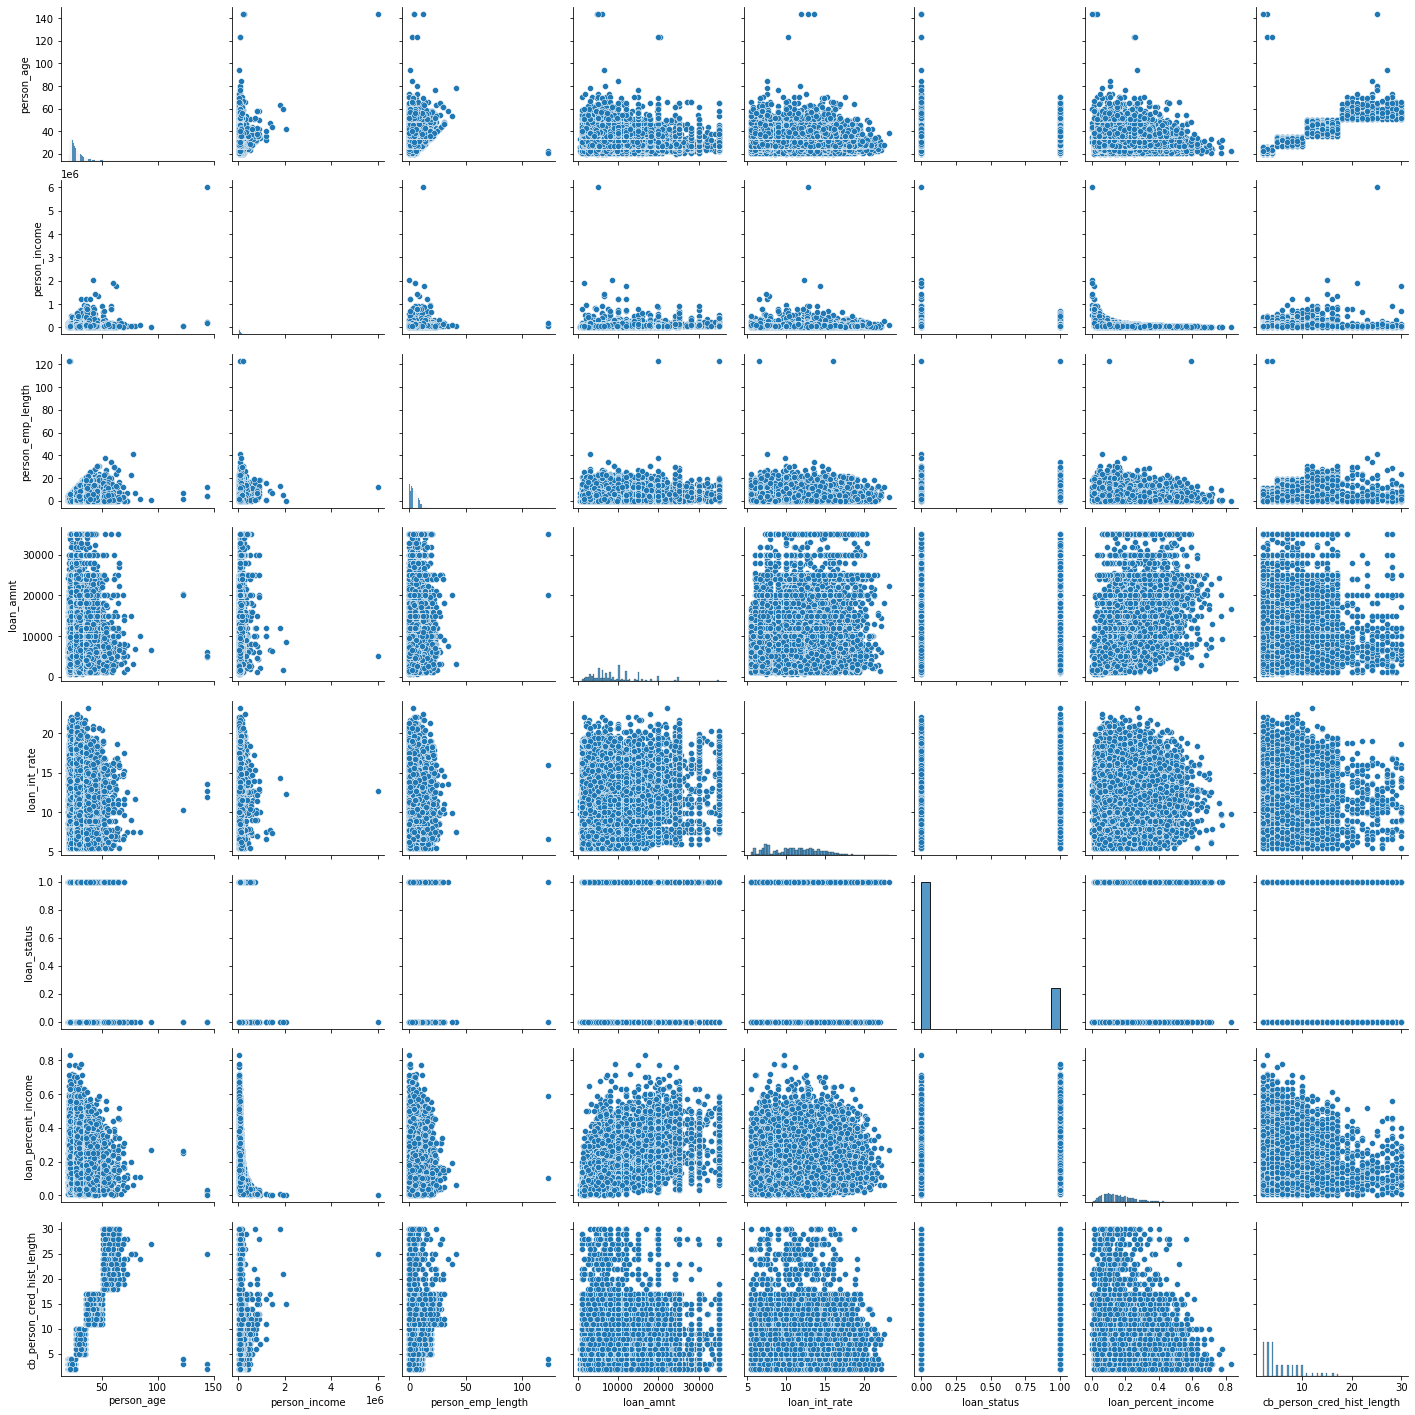

In [104]:
#Create a pairplot - Credit Data
sns.pairplot(dfc)

<b> Look for nulls <b>

In [105]:
#nulls? credit
dfc.isnull().sum().sort_values()

#what to do with the nulls in person emp length and loan int rate?

person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
person_emp_length              895
loan_int_rate                 3116
dtype: int64

<b> Drop columns with nulls</b>

The cell above shows that there are nulls in the person_emp_length and loan_int_rate. Drop them since there are too many of them (nulls). 

In [106]:
dfc = dfc.drop(columns={'person_emp_length'})
dfc = dfc.drop(columns={'loan_int_rate'})
dfc.head()

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,PERSONAL,D,35000,1,0.59,Y,3
1,21,9600,OWN,EDUCATION,B,1000,0,0.10,N,2
2,25,9600,MORTGAGE,MEDICAL,C,5500,1,0.57,N,3
3,23,65500,RENT,MEDICAL,C,35000,1,0.53,N,2
4,24,54400,RENT,MEDICAL,C,35000,1,0.55,Y,4


<b> Determine outliers - Credits Data <b>


<l1>  The pairplot and describe function shows presense of outliers. 
In the next step, we will determine what the outliers are using interquartile range

In [297]:
#determine and eliminate outliers - person_income and person_age
dfc_income_per25 = round(np.percentile(dfc["person_income"],25),2)
dfc_income_per75 = round(np.percentile(dfc["person_income"],75),2)
low_out_income = dfc_income_per25*1.5
high_out_income = dfc_income_per75*1.5

dfc_age_per25 = round(np.percentile(dfc["person_age"],25),2)
dfc_age_per75 = round(np.percentile(dfc["person_age"],75),2)
low_out_age = dfc_age_per25*1.5
high_out_age = dfc_age_per75*1.5

print("Outlier range for income is between $" + str(low_out_income) + " and $" + str(high_out_income ))
print("Outlier range for age is between " + str(low_out_age) + " and " + str(high_out_age ) + " years.")

Outlier range for income is between $97500.0 and $135000.0
Outlier range for age is between 54.0 and 60.0 years.


Outliers for age are 34.5 years and 45 years. The range seems too small. We know that inidividuals in their 20s to 80s would have a credit history, loans to pay. Since working life of people is usually between 20s and 60s, which usually overlaps with time people will have loans, we will fiter our data for that range. 

In [298]:
#filter outliers
dfc = dfc[(dfc['person_income'] >= low_out_income) & (dfc['person_income'] <= high_out_income)]
dfc = dfc[(dfc['person_age'] >= low_out_age) & (dfc['person_age'] <= high_out_age)]
dfc = dfc[dfc["person_income"].between(low_out_income, high_out_income)]
dfc = dfc[dfc["person_income"] < 118800]

dfc = dfc[dfc["person_age"] > 20]
dfc = dfc[dfc["person_age"] < 60]

dfc.describe(include="all")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0
unique,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,0,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3> Replot pairplot data after cleanup

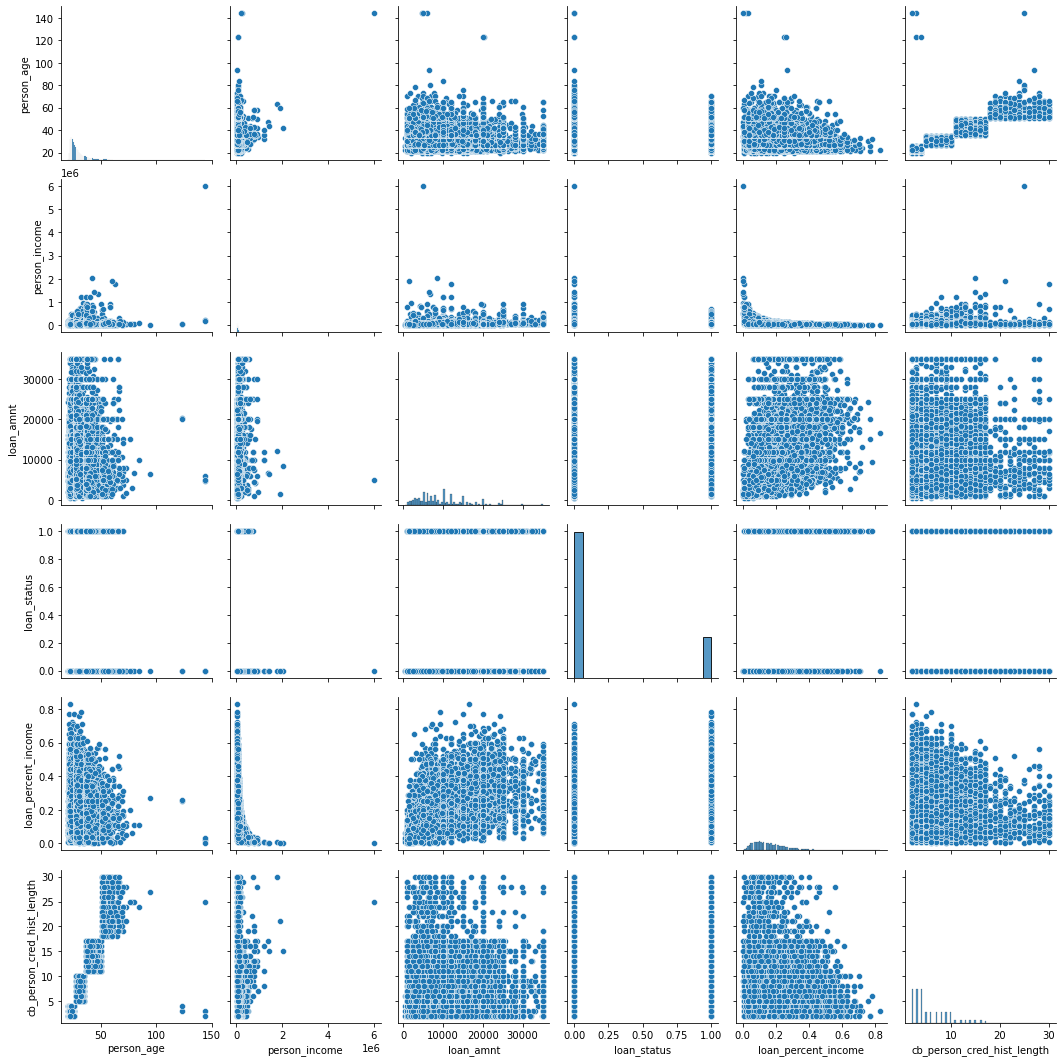

In [109]:
#plot data after cleanup
sns.pairplot(dfc)

We can see that there is a strong correlation between Loan Amount and Loan Amount Percent of Income. 
Next, we see a heatmap for correlations

<b> Correlation heatmap

<AxesSubplot:>

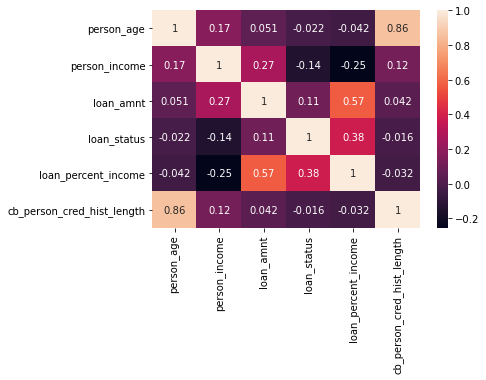

In [110]:
sns.heatmap(dfc.corr(),annot=True, yticklabels=True)

<h1> <b> Part 1 - Data Preparation: Real Estate

You'll do a linear regression to predict the <b>SALES PRICE</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not. 

We look through minimums, maximum and mean values for all. 
<li> The max lot size seems too high compared to the mean. This could possibly be an outlier. 
<li> Residential units has a high maximum number. This could be for a multi family unit. 
<li> Do a describe
<li> Do a pairplot
<li> Look for nulls. Drop nulls
<li> Determine OUtliers

In [307]:
dfr.describe(include="all")

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,48248.000000,48248.000000,48248.000000,48248.000000,48248.000000,4.824800e+04,48248.000000,4.824800e+04
mean,3.251554,4984.154535,234.400742,2.569682,2.837755,3.672552e+03,1827.738082,1.155576e+06
std,0.903331,3427.528068,496.413133,17.468624,20.752771,2.947540e+04,464.418481,1.340423e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,2204.000000,21.000000,1.000000,1.000000,8.280000e+02,1920.000000,8.056000e+04
50%,3.000000,4660.000000,45.000000,1.000000,1.000000,1.620000e+03,1931.000000,4.800000e+05
75%,4.000000,6996.000000,94.000000,2.000000,2.000000,2.520000e+03,1961.000000,8.300000e+05
max,5.000000,16319.000000,9009.000000,1844.000000,2261.000000,3.750565e+06,2017.000000,2.210000e+09


<b> Look for nulls

In [308]:
#Are there nulls? Real Estate
dfr.isnull().sum().sort_values()

BOROUGH              0
BLOCK                0
LOT                  0
RESIDENTIAL UNITS    0
TOTAL UNITS          0
GROSS SQUARE FEET    0
YEAR BUILT           0
SALE PRICE           0
dtype: int64

There are no nulls in our data. 

<b> Drop columns </b>

We drop
<ui> Tax class at time of sale
<ui> Building class at tikme of sale
<ui> Zip code

We assume that, given the data and limits of our analyisis, it will nit have an impact on prediction. 

In [304]:
dfr.head()
tax = dfr.pop("TAX CLASS AT TIME OF SALE")
dfr.join(tax)
bldgclass = dfr.pop("BUILDING CLASS AT TIME OF SALE")
dfr.join(bldgclass)
zip = dfr.pop("ZIP CODE")
dfr.join(zip)

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,ZIP CODE
0,1,392,6,5,5,6440,1900,6625000,10009
1,1,402,21,10,10,6794,1913,3936272,10009
2,1,404,55,6,6,4615,1900,8000000,10009
3,1,406,32,8,8,4226,1920,3192840,10009
4,1,387,153,24,24,18523,1920,16232000,10009
...,...,...,...,...,...,...,...,...,...
48243,5,7349,34,2,2,2575,1998,450000,10309
48244,5,7349,78,2,2,2377,1998,550000,10309
48245,5,7351,60,2,2,1496,1925,460000,10309
48246,5,7100,28,0,7,64117,2001,11693337,10309


<b> Plot a pairplot - Real Estate Data

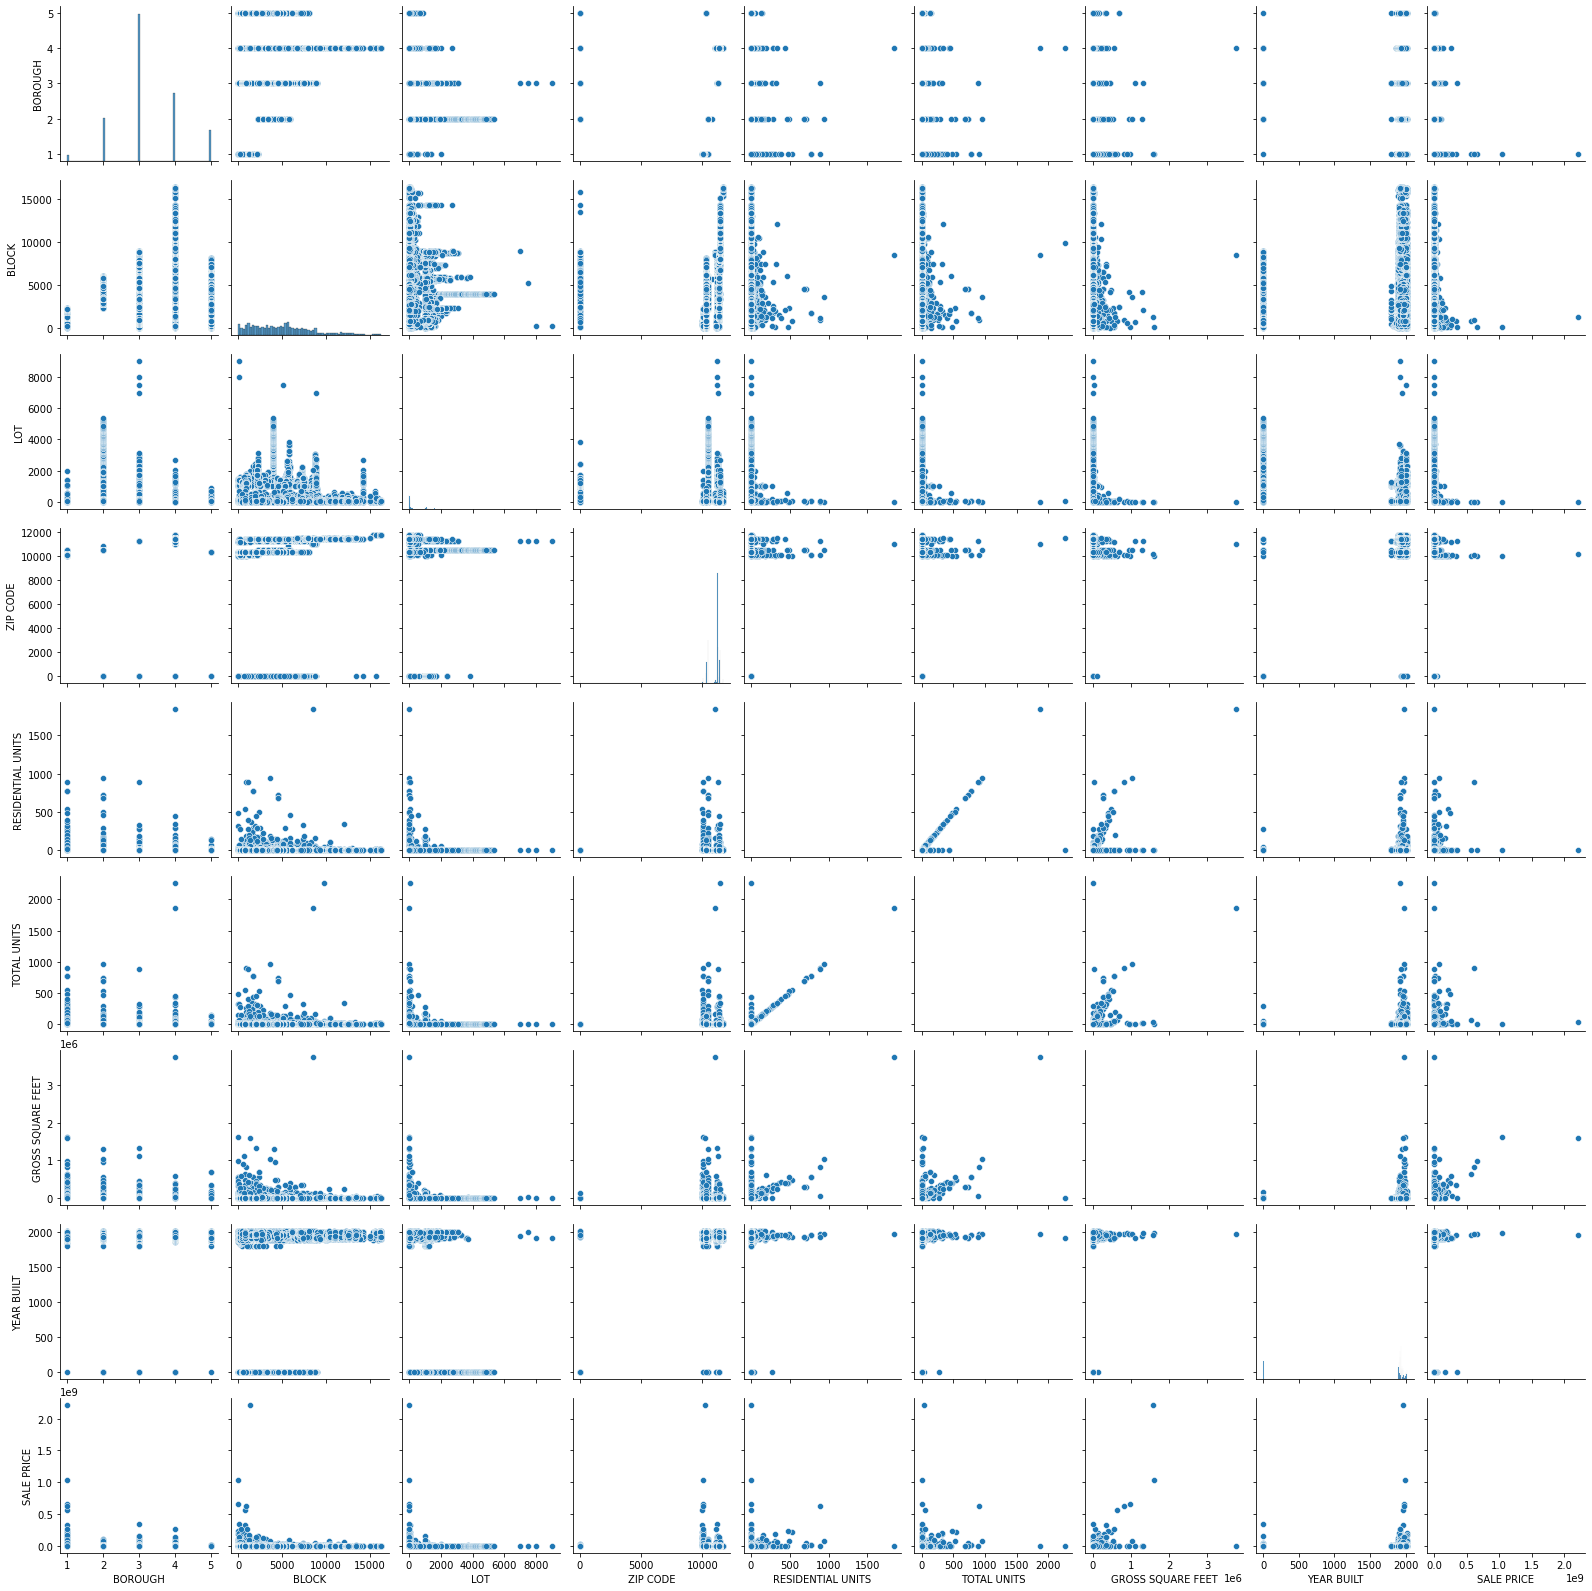

In [229]:
#Create a pairplot - Real Estate Data
sns.pairplot(dfr)

<b> Correlation Heatmap

<AxesSubplot:>

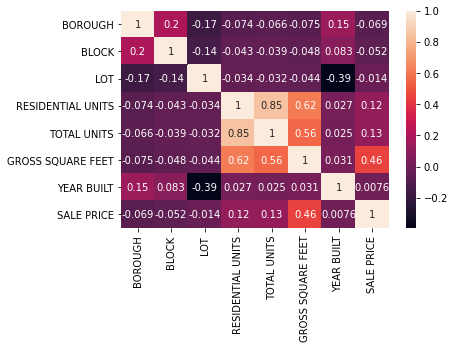

In [309]:
sns.heatmap(dfr.corr(),annot=True, yticklabels=True)

<b> Determine outliers

In [ ]:
dfr.head()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,1,392,6,5,5,6440,1900,6625000
1,1,402,21,10,10,6794,1913,3936272
2,1,404,55,6,6,4615,1900,8000000
3,1,406,32,8,8,4226,1920,3192840
4,1,387,153,24,24,18523,1920,16232000


In [305]:
dfr_lot_per25 = round(np.percentile(dfr["LOT"],25),2)
dfr_lot_per75 = round(np.percentile(dfr["LOT"],75),2)
low_out_lot = dfr_lot_per25*1.5
high_out_lot = dfr_lot_per75*1.5

dfr_resunits_per25 = round(np.percentile(dfr["RESIDENTIAL UNITS"],25),2)
dfr_resunits_per75 = round(np.percentile(dfr["RESIDENTIAL UNITS"],75),2)
low_out_resunits = dfr_resunits_per25*1.5
high_out_resunits = dfr_resunits_per75*1.5

dfr_sale_per25 = round(np.percentile(dfr["SALE PRICE"],25),2)
dfr_sale_per75 = round(np.percentile(dfr["SALE PRICE"],75),2)
low_out_sale = dfr_sale_per25*1.5
high_out_sale = dfr_sale_per75*1.5


print("Outlier range for lot size is between " + str(low_out_lot) + " and " + str(high_out_lot ))
print("Outlier range for residential unit is between " + str(low_out_resunits) + " and " + str(high_out_resunits))
print("Outlier range for Sales price is between $" + str(low_out_sale) + " and $" + str(high_out_sale))



Outlier range for lot size is between 31.5 and 141.0
Outlier range for residential unit is between 1.5 and 3.0
Outlier range for Sales price is between $120840.0 and $1245000.0


<h1><b> Part 2 - Regression Sale Price

We determined outloers in the part above. Here we will drop the outliers. 

In [310]:

#filter outliers
dfr1 = dfr[(dfr['LOT'] >= low_out_lot) & (dfr['LOT'] <= high_out_lot)]
dfr1 = dfr[(dfr['RESIDENTIAL UNITS'] >= low_out_resunits) & (dfr['RESIDENTIAL UNITS'] <= high_out_resunits)]
dfr1 = dfr[(dfr['SALE PRICE'] >= low_out_sale) & (dfr['SALE PRICE'] <= high_out_sale)]
#dfr1 = dfr.drop(columns={"TAX CLASS AT TIME OF SALE"})
#dfr1 = dfr.drop(columns={"BUILDING CLASS AT TIME OF SALE"})
#dfr1 = dfr.drop(columns={"ZIP CODE"})
#dfr1.describe(include="all")

In [311]:
dfr1.head()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
24,1,765,25,9,9,6330,1901,416790
25,1,765,25,9,9,6330,1901,630370
33,1,744,32,24,24,12200,1850,282000
106,1,762,61,0,12,55473,1926,1161500
108,1,805,39,0,15,79465,1913,220000


In [312]:
#declare borough as a category so that when the dummy is done, the program knows to read as a categoriacal column

dfr1["BOROUGH"] = dfr1["BOROUGH"].astype("category")
#dfr["LOT"] = dfr["LOT"].astype("category")
#dfr["BLOCK"] = dfr["BLOCK"].astype("category") 

<ipython-input-312-9332b0ce5e07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr1["BOROUGH"] = dfr1["BOROUGH"].astype("category")


In [267]:
#do dummie
dfr_tmp = pd.get_dummies(dfr1)
dfr_tmp.head()

,BLOCK,LOT,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5
24,765,25,9,9,6330,1901,416790,1,0,0,0,0
25,765,25,9,9,6330,1901,630370,1,0,0,0,0
33,744,32,24,24,12200,1850,282000,1,0,0,0,0
106,762,61,0,12,55473,1926,1161500,1,0,0,0,0
108,805,39,0,15,79465,1913,220000,1,0,0,0,0


In [268]:
dfr2 = pd.get_dummies(dfr_tmp, drop_first=True)
dfr2.head(5)

,BLOCK,LOT,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5
24,765,25,9,9,6330,1901,416790,1,0,0,0,0
25,765,25,9,9,6330,1901,630370,1,0,0,0,0
33,744,32,24,24,12200,1850,282000,1,0,0,0,0
106,762,61,0,12,55473,1926,1161500,1,0,0,0,0
108,805,39,0,15,79465,1913,220000,1,0,0,0,0


In [269]:
#split data in x and y and put them in arrays. 
#X values in a DF
dfX = dfr2.drop(columns={"SALE PRICE"})
dfY = dfr2["SALE PRICE"]

#If we want an array for sklearn
y = np.array(dfY).reshape(-1,1)
x = np.array(dfX)
x.shape, y.shape

#48248 rows and 1 column for output. 
#(48248,12362) (48248,1) - we have 48248 rows and using 12362 features to predict Y which correctly shows as 1

((29354, 11), (29354, 1))

In [274]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=.3) #30% of data for testing. Everytime you do this, you get diff data split. 
#still 30% for testing, but different values
print("X-Train:", xTrain.shape)
print("X-Test:", xTest.shape)
print("Y-Train:", yTrain.shape)
print("Y-Test:", yTest.shape)

X-Train: (20547, 11)
X-Test: (8807, 11)
Y-Train: (20547, 1)
Y-Test: (8807, 1)


In [275]:
# Implementing Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xTrain,yTrain)

LinearRegression()

In [276]:
## Seeing the result of Linear Regression
#I'll use the dataframes to make sure that we get the column names. 

# This one is using the post-split test data. Hence the lack of labels. 
import statsmodels.api as sm
X2 = sm.add_constant(xTrain)
est = sm.OLS(yTrain,X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     452.6
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:21:09   Log-Likelihood:            -2.8340e+05
No. Observations:               20547   AIC:                         5.668e+05
Df Residuals:                   20536   BIC:                         5.669e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.525e+05   1.01e+04     54.893      0.0

In [277]:
# Predictiions for TEST
# Calculate RMSE - RMSE calculated how far are our vaulues from the Regression Line
ypred = model.predict(xTest)
mean_squared_error(ypred,yTest,squared=False)


275843.6092824781

<h1> <b> Part 3 - Logistic Regression - Credit Data

Logistic Regression - Credit Data: Loan Status (35% of grade)</h3>
You'll do a logistic regression to predict the <b>LOAN STATUS</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.

In [32]:
dfc.head()

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,PERSONAL,D,35000,1,0.59,Y,3
1,21,9600,OWN,EDUCATION,B,1000,0,0.10,N,2
2,25,9600,MORTGAGE,MEDICAL,C,5500,1,0.57,N,3
3,23,65500,RENT,MEDICAL,C,35000,1,0.53,N,2
4,24,54400,RENT,MEDICAL,C,35000,1,0.55,Y,4


In [34]:
#baseline accuracy
1-dfc["loan_status"].mean()

0.7818360394094718

Split data 

In [285]:
#split data
test1, train1 = train_test_split(dfc,test_size=0.3)

In [287]:
#Define formula
form = "loan_status ~ person_age + person_income + person_home_ownership +loan_intent+ loan_amnt + loan_grade + person_income + loan_amnt + cb_person_cred_hist_length"
model1 = sm.logit(data=train1, formula=form).fit()

#Make predictions for later, get summary for now
preds1 = model1.predict(test1)
model1.summary()

         Current function value: 0.361960
         Iterations: 35


C:\Users\Shubhneet Kaur Lotay\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 9775
Model:                          Logit   Df Residuals:                     9756
Method:                           MLE   Df Model:                           18
Date:                Sat, 04 Dec 2021   Pseudo R-squ.:                  0.3025
Time:                        10:58:23   Log-Likelihood:                -3538.2
converged:                      False   LL-Null:                       -5072.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.1760      0.226     -5.215      0.000      -1.618      -0.734
person_home_ownership[T.OTHER]     0.8982      0.453      1.982      0.048       0.010       1.787
person_home_ownership[T.OWN]      -0.9819      0.161     -6.088      0.000      -1.298      -0.666
person_home_ownership[T.RENT]      0.8899      0.071     12.575      0.000       0.751       1.029
loan_intent[T.EDUCATION]          -0.7929      0.099     -8.001      0.000      -0.987      -0.599
loan_intent[T.HOMEIMPROVEMENT]     0.1116      0.112      0.998      0.318      -0.108       0.331
loan_intent[T.MEDICAL]            -0.2617      0.095     -2.751      0.006      -0.448      -0.075
loan_intent[T.PERSONAL]           -0.6041      0.101     -5.963      0.000      -0.803      -0.406
loan_intent[T.VENTURE]            -0.9820      0.108     -9.119      0.000      -1.193      -0.771
loan_grade[T.B]                    0.3418      0.083      4.129      0.000       0.180       0.504
loan_grade[T.C]                    0.6245      0.089      7.031      0.000       0.450       0.799
loan_grade[T.D]                    2.5756      0.098     26.180      0.000       2.383       2.768
loan_grade[T.E]                    3.2859      0.171     19.178      0.000       2.950       3.622
loan_grade[T.F]                    3.1033      0.339      9.165      0.000       2.440       3.767
loan_grade[T.G]                   36.2180   2.66e+05      0.000      1.000    -5.2e+05     5.2e+05
person_age                     -2.277e-05      0.009     -0.002      0.998      -0.019       0.018
person_income                  -3.897e-05   1.58e-06    -24.615      0.000   -4.21e-05   -3.59e-05
loan_amnt                          0.0001   5.71e-06     20.331      0.000       0.000       0.000
cb_person_cred_hist_length         0.0066      0.015      0.455      0.649      -0.022       0.035
==================================================================================================
"""

<b> Drop columns based on Logit Regresssion Results

The p value for loan_grade and person_age is high, meaning that it is not really usefull to get the final result. We will drop the column and re run the regression

In [288]:
dfc1 = dfc.drop(columns={"loan_grade"})
dfc1 = dfc.drop(columns={"person_age"})
dfc1 = dfc.drop(columns={"cb_person_cred_hist_length"})
dfc1 = dfc.drop(columns={"loan_intent"})
dfc1.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,C,35000,14.27,1,0.55,Y,4


In [289]:
#split data
test2, train2 = train_test_split(dfc1,test_size=0.3)

In [290]:
#Define formula
form = "loan_status ~ person_income + loan_amnt"
model2 = sm.logit(data=train2, formula=form).fit()

#Make predictions for later, get summary for now
preds2 = model2.predict(test2)
model2.summary()

Optimization terminated successfully.
         Current function value: 0.456497
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 9775
Model:                          Logit   Df Residuals:                     9772
Method:                           MLE   Df Model:                            2
Date:                Sat, 04 Dec 2021   Pseudo R-squ.:                  0.1270
Time:                        10:59:45   Log-Likelihood:                -4462.3
converged:                       True   LL-Null:                       -5111.6
Covariance Type:            nonrobust   LLR p-value:                9.461e-283
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4270      0.063     -6.789      0.000      -0.550      -0.304
person_income -3.694e-05   1.34e-06    -27.579      0.000   -3.96e-05   -3.43e-05
loan_amnt         0.0001   4.94e-06     24.589      0.000       0.000       0.000
=================================================================================
"""

In [291]:
preds2.head()
#record 7026 is 18% likley to defualt

13454    0.251609
1215     0.356484
17575    0.065238
10045    0.268060
19108    0.153810
dtype: float64

In [292]:
#translate predictions to 1 or 0 values. 
def convert_prob_to_label(prob, cutoff = 0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label

In [293]:
labels = convert_prob_to_label(np.array(preds2))

<AxesSubplot:>

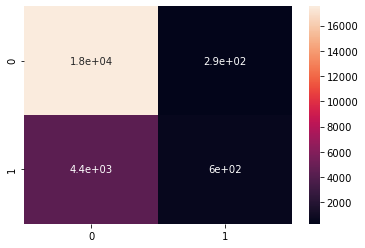

In [294]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test2["loan_status"], labels)
sns.heatmap(conf_matrix, annot=True)

In [295]:
mis_rate = (conf_matrix[[1],[0]].flat[0] + conf_matrix[[0],[1]].flat[0])/len(test2)
print(mis_rate)
print(accuracy_score(test2["loan_status"], labels))

0.20494606682451985
0.7950539331754801


<h1> <b> Part 4 - Are the models good?


<b> Credit Data </b>

Our model shows a R2 of .18 and RMSE of $275,843. R2 tells us how much variables have been captured in our model. A value of .18 is low indicating that it is not a good model to predict sale price. 

Usually, in industry, zip code would play an important role in sale price prediction. HOwever, for us, the zip code is limited to numbers and we do not know what the popular zip codes are. Usually, homes in popular zip codes would be expensive and would thus have an impact ob predicting sale price. 


<b> Real Estate </b> 

We started with the baseline accurace of 78%. After getting rid of unwanted values (low p values), the accuracy is 79.50%. On its owen, the model accuracy is okay. However, it only shows marginal improvement of 1.33% compared to based accuracy. 


